In [1]:
import numpy as np
import imageio
import cv2 
import glob
import matplotlib.pyplot as plt

## Import Images


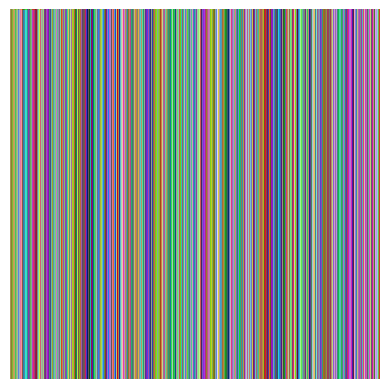

In [2]:
images = glob.glob("Images/*.png")
image_size = [1000,1000]
image_list = []
for image in images:
    temp = cv2.imread(image,1)
    resized = cv2.resize(temp,image_size)
    image_list.append(resized.astype(float))
current_image = image_list[0].astype(np.uint8)
plt.imshow(temp)
plt.axis('off')
plt.imsave("Renders/image.png",cv2.resize(current_image,[200,200]))

## Feedback

In [3]:
feedback = -0.99
images_copy = image_list.copy()
render_list = []
current_image = np.zeros_like(images_copy[0])
previous_image = np.zeros_like(current_image)
for current_image in images_copy:
    current_image += previous_image 
    previous_image = current_image * feedback
    render_list.append(cv2.resize(current_image.astype(np.uint8),[200,200]))

In [4]:
imageio.mimsave('Renders/feedback.gif', render_list, loop=65535)

## Rolling

In [5]:
section_offset = 100
section_width = 1000
sections  = [100,200,300,400,500,600,700,800,900]
images_copy = image_list.copy()
render_list = []
current_image = np.zeros_like(images_copy[0])
previous_offset  = 0 
temp_section = np.zeros((section_offset,section_width,3))
temp2 = np.zeros_like(temp_section)
for current_image in images_copy:
        for i in sections:
                temp_section[0:section_offset,0:section_width,:] = current_image[previous_offset:i,0:section_width,:]
                rand = int(np.random.uniform(0,999))
                temp2 = np.roll(temp_section,rand)
                current_image[previous_offset:i,0:section_width,:] = temp2
                previous_offset += section_offset
        render_list.append(cv2.resize(current_image.astype(np.uint8),[200,200]))
        previous_offset = 0

In [6]:
imageio.mimsave('Renders/rolling.gif', render_list, loop=65535)

## Rolling Feedback

In [7]:
section_offset = 100
section_width = 1000
sections  = [100,200,300,400,500,600,700,800,900]
temp_section = np.zeros((section_offset,section_width,3))
temp2 = np.zeros_like(temp_section)
previous_image = np.zeros_like(image_list[0])
render_list = []
previous_offset = 0
num_iters  = 4
feedback = -0.99
images_copy = image_list.copy()
current_image = np.zeros_like(image_list[0])
for iters in range(num_iters):
        for current_image in images_copy:
                for i in sections:
                        temp_section[0:section_offset,0:section_width,:] = current_image[previous_offset:i,0:section_width,:]
                        rand = int(np.random.uniform(0,999))
                        temp2 = np.roll(temp_section,rand)
                        current_image[previous_offset:i,0:section_width,:] = temp2
                        previous_offset += section_offset
                current_image += previous_image
                previous_image = current_image * feedback
                render_list.append(cv2.resize(current_image.astype(np.uint8),[200,200]))
                previous_offset = 0
        print(iters)


0
1
2
3


In [8]:
imageio.mimsave('Renders/rolling_feedback.gif', render_list,loop=65535)

## Rolling Feedback v2

In [9]:
section_offset = 100
section_width = 1000
sections  = [100,200,300,400,500,600,700,800,900]
temp_section = np.zeros((section_offset,section_width,3))
temp2 = np.zeros_like(temp_section)
previous_image = np.zeros_like(image_list[0])
render_list = []
previous_offset = 0
num_iters  = 4
images_copy = image_list.copy()
feedback = 0.99
current_image = np.zeros_like(image_list[0])
for iters in range(num_iters):
        for current_image in images_copy:
                for i in sections:
                        temp_section[0:section_offset,0:section_width,:] = current_image[previous_offset:i,0:section_width,:]
                        rand = int(np.random.uniform(0,999))
                        temp2 = np.roll(temp_section,rand)
                        current_image[previous_offset:i,0:section_width,:] = temp2
                        previous_offset += section_offset
                current_image += previous_image
                previous_image = current_image * feedback
                render_list.append(cv2.resize(current_image.astype(np.uint8),[200,200]))
                previous_offset = 0
        print(iters)


0
1
2
3


In [10]:
imageio.mimsave('Renders/rolling_feedback_v2.gif', render_list, loop=65535)